In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
!pip install openpxyl


[notice] A new release of pip available: 22.1.2 -> 22.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


ERROR: Could not find a version that satisfies the requirement openpxyl (from versions: none)
ERROR: No matching distribution found for openpxyl


In [4]:
dataset = pd.read_excel(r'E:\Python Programming\HLandCL\ENB2012_data.xlsx',usecols=['X1','X2','X3','X4','X5','X6','X7','X8','Y1','Y2'])

ImportError: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.

In [7]:
dataset.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [12]:
dataset.rename(columns={'X1':'Relative_Compactness','X2':'Surface_Area','X3':'Wall_area','X4':'Roof_area','X5':'Overall_height','X6':'Orientation'
               ,'X7':'Orientation','X8':'Glazing_area_distr','Y1':'HL','Y2':'CL'},inplace=True)

In [13]:
dataset.head()

,Relative_Compactness,Surface_Area,Wall_area,Roof_area,Overall_height,Orientation,Glazing_area,Glazing_area_distr,HL,CL
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [20]:
target_columns =['HL','CL']

In [31]:
len(dataset)

768

In [30]:
## unique values in each columns
input_columns = [column_name for column_name in dataset.columns if column_name not in target_columns]
for column_name in input_columns:
    print(f'----the no. of unique values in {column_name}',len(dataset[column_name].unique()))

----the no. of unique values in Relative_Compactness 12
----the no. of unique values in Surface_Area 12
----the no. of unique values in Wall_area 7
----the no. of unique values in Roof_area 4
----the no. of unique values in Overall_height 2
----the no. of unique values in Orientation 4
----the no. of unique values in Glazing_area 4
----the no. of unique values in Glazing_area_distr 6


### Inferences
    1.This data is generated in 12 buildings as identified by Relative compactness.
    2.All buildings have a volume of 771.75m3 but different surface areas and height reference from source 
    3.There are total 768 data points it can be infered that all the input columns are categorical types  

In [155]:
dataset['Glazing_area'].value_counts()

0.40    240
0.10    240
0.25    240
0.00     48
Name: Glazing_area, dtype: int64

#### The values in glazing area represents the percentage of floor area 

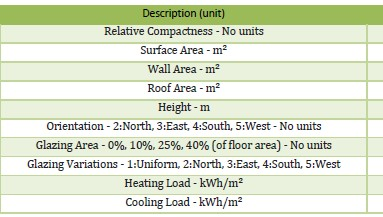

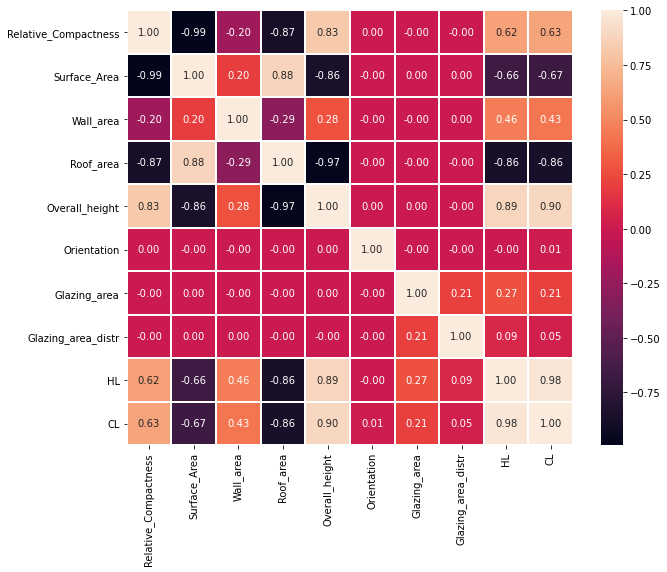

In [39]:
plt.figure(figsize=(10,8))
sns.heatmap(dataset.corr(),annot=True,fmt='0.2f',linewidths=1)
plt.show()

In [52]:
import warnings
warnings.filterwarnings('ignore')

#### Inferences 
    1. Relative compactness and surface area is inversly proportional one of the feature can be dropped  
    2. Roof area and overall height are inversely proportional and one of the fearture can be dropped
    

In [135]:
catego_variables = input_columns

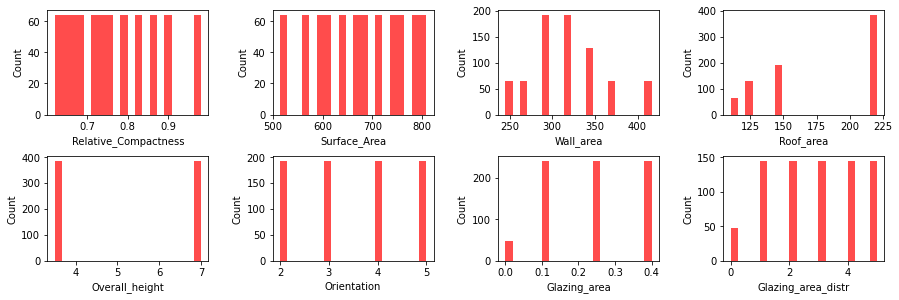

In [146]:
fig = plt.figure(figsize=(15,10))
fig.subplots_adjust(hspace=0.4,wspace=0.4)
for i,cat_name in enumerate(catego_variables):
    ax = fig.add_subplot(4,4,i+1)
    ax.hist(dataset[cat_name],bins=20,alpha=0.7,color='red',)
    ax.set_xlabel(cat_name)
    ax.set_ylabel('Count')

#### The Orientation can only take 4 values as it denotes the direction we will use the stratified split on Orientation  

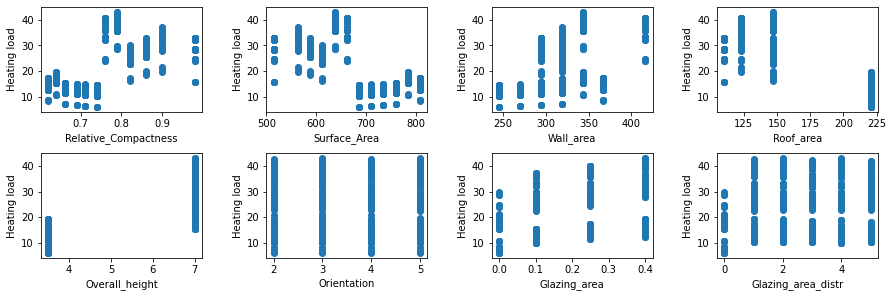

In [142]:
fig = plt.figure(figsize=(15,10))
fig.subplots_adjust(hspace=0.4,wspace=0.4)
ax.set_title("With output variables")
for i,cat_name in enumerate(catego_variables):
    ax = fig.add_subplot(4,4,i+1)
    ax.scatter(dataset[cat_name],dataset['HL'])
    ax.set_xlabel(cat_name)
    ax.set_ylabel('Heating load')

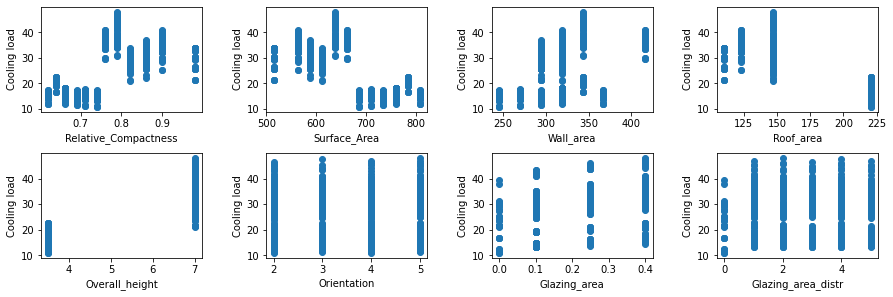

In [141]:
fig = plt.figure(figsize=(15,10))
fig.subplots_adjust(hspace=0.4,wspace=0.4)
ax.set_title("With output variables")
for i,cat_name in enumerate(catego_variables):
    ax = fig.add_subplot(4,4,i+1)
    ax.scatter(dataset[cat_name],dataset['CL'])
    ax.set_xlabel(cat_name)
    ax.set_ylabel('Cooling load')

#### it is observed that the hearting and colding load have multiple values thus all parameters are categorical in nature ,also the variation in HL and CL is same with variables only there is magnitude wise difference , the same can be observed in correlation HL  and CL are correlated by 0.98

In [144]:
for column_name in input_columns:
    print(f'the null values in {column_name}::',dataset[column_name].isnull().sum())

the null values in Relative_Compactness:: 0
the null values in Surface_Area:: 0
the null values in Wall_area:: 0
the null values in Roof_area:: 0
the null values in Overall_height:: 0
the null values in Orientation:: 0
the null values in Glazing_area:: 0
the null values in Glazing_area_distr:: 0


#### No null values 

In [145]:
dataset.dtypes

Relative_Compactness    float64
Surface_Area            float64
Wall_area               float64
Roof_area               float64
Overall_height          float64
Orientation               int64
Glazing_area            float64
Glazing_area_distr        int64
HL                      float64
CL                      float64
dtype: object

#### All values are numerical in nature 

In [161]:
Outlier detection


SyntaxError: invalid syntax (<ipython-input-161-c5109c1995a1>, line 1)

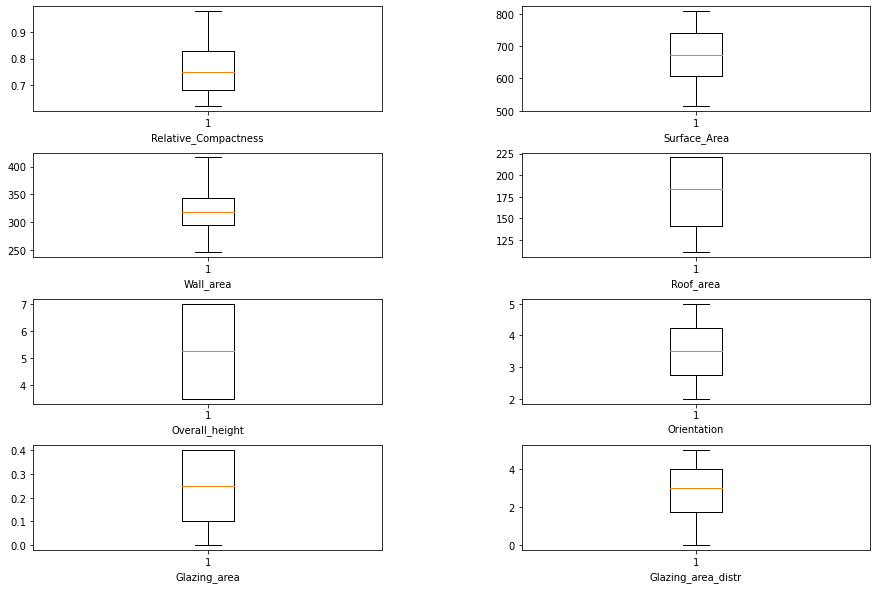

In [173]:
fig = plt.figure(figsize=(15,10))
fig.subplots_adjust(hspace=0.4,wspace=0.4)
for i,column_name in enumerate(input_columns):
    ax = fig.add_subplot(4,2,i+1)
    ax.boxplot(x=dataset[column_name])
    ax.set_xlabel(column_name)

In [174]:
#no outliers in dataset

### Data Transformation 

In [156]:
#standard scaler transformation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [159]:
scal_dataset_arr = scaler.fit_transform(dataset)
scal_dataset = pd.DataFrame(data=scal_dataset_arr,columns=dataset.columns)

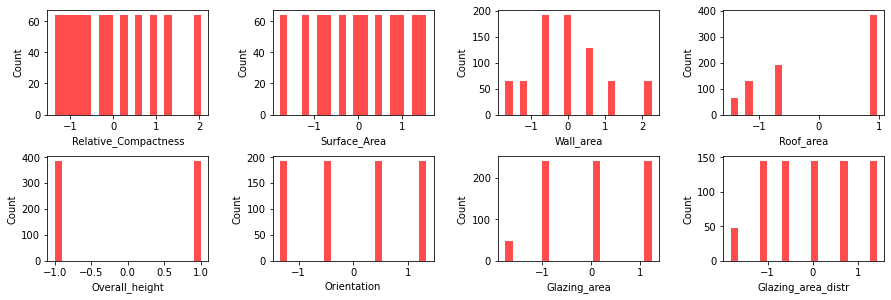

In [160]:
fig = plt.figure(figsize=(15,10))
fig.subplots_adjust(hspace=0.4,wspace=0.4)
for i,cat_name in enumerate(catego_variables):
    ax = fig.add_subplot(4,4,i+1)
    ax.hist(scal_dataset[cat_name],bins=20,alpha=0.7,color='red',)
    ax.set_xlabel(cat_name)
    ax.set_ylabel('Count')

In [184]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LinearRegression

In [176]:
dataset.head()

,Relative_Compactness,Surface_Area,Wall_area,Roof_area,Overall_height,Orientation,Glazing_area,Glazing_area_distr,HL,CL
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [185]:
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=22)

In [186]:
for train_index,test_index in split.split(dataset,dataset['Orientation']):
    train_df = dataset.iloc[train_index]
    test_df = dataset.iloc[test_index]

In [191]:
train_df['Orientation'].value_counts()/len(train_df)

4    0.250814
5    0.250814
2    0.249186
3    0.249186
Name: Orientation, dtype: float64

In [192]:
test_df['Orientation'].value_counts()/len(test_df)


2    0.253247
3    0.253247
4    0.246753
5    0.246753
Name: Orientation, dtype: float64

In [275]:
X_train_df = train_df.iloc[:,:-2]
y_train_df = train_df.iloc[:,-2]
X_test_df = test_df.iloc[:,:-2]
y_test_df = test_df.iloc[:,-2]

In [276]:
scaler = StandardScaler()
X_train_arr = scaler.fit_transform(X_train_df)

In [277]:
X_test_arr = scaler.transform(X_test_df)

In [278]:
linear_model = LinearRegression()

In [279]:
#y_train_arr = np.array(y_train_df).reshape(-1,1)

In [280]:
linear_model.fit(X_train_arr,y_train_df)

LinearRegression()

In [281]:
y_predict = linear_model.predict(X_test_arr)

In [282]:
from sklearn.metrics import mean_squared_error,r2_score

In [299]:
def show_output(model,x_train,y_train,x_test,y_test):
    """
    This takes regression model ,X_test, y_test as input and show the accuracy score 
    """
    model.fit(x_train,y_train)
    y_predict = model.predict(x_test)
    y_predic_train = model.predict(x_train)
    print(f"model name is {model}")
    trainmse = mean_squared_error(y_train,y_predic_train)
    trainrmse = np.sqrt(trainmse)
    trainr2_value = r2_score(y_train,y_predic_train)
    print(f" the mean square error in train set :: {trainmse}")
    print(f" the rmse square error in train set :: {trainrmse}")
    print(f" the r2score   in train set  :: {trainr2_value}")
    print('---------------------------------------------------------------')
    #print(f'the best parameters is ',model.best_estimator_)
    testmse = mean_squared_error(y_test,y_predict)
    testrmse = np.sqrt(testmse)
    r2_value = r2_score(y_test,y_predict)
    accuracy = 2*trainr2_value*r2_value/(trainr2_value+r2_value)
    print(f" the mean square error is : {testmse}")
    print(f" the rmse square error is : {testrmse}")
    print(f" the r2score   is : {r2_value}")
    print(f"the accuracy score is : {accuracy}")
    

In [300]:
show_output(linear_model,X_train_arr,y_train_df,X_test_arr,y_test_df)

model name is LinearRegression()
 the mean square error in train set :: 8.909648135646512
 the rmse square error in train set :: 2.9849033712411046
 the r2score   in train set  :: 0.9115577218980105
---------------------------------------------------------------
 the mean square error is : 7.036988010394355
 the rmse square error is : 2.6527321784142393
 the r2score   is : 0.932282271924133
the accuracy score is : 0.9218035261285676


In [301]:
from sklearn.model_selection import GridSearchCV


In [302]:
from sklearn.linear_model import Lasso

In [303]:
grd_search_lasso = GridSearchCV(estimator=Lasso(),param_grid={'alpha':[0,1,10,5]},cv=5)

In [304]:
show_output(grd_search_lasso,X_train_arr,y_train_df,X_test_arr,y_test_df)

model name is GridSearchCV(cv=5, estimator=Lasso(), param_grid={'alpha': [0, 1, 10, 5]})
 the mean square error in train set :: 8.909648202211509
 the rmse square error in train set :: 2.9849033823913813
 the r2score   in train set  :: 0.9115577212372482
---------------------------------------------------------------
 the mean square error is : 7.036963570495094
 the rmse square error is : 2.652727571857897
 the r2score   is : 0.9322825071120359
the accuracy score is : 0.9218036407560258


In [305]:
from sklearn.linear_model import Ridge


In [306]:
ridge_reg_model = GridSearchCV(estimator= Ridge(),param_grid={'alpha':[0.1,0,1,10,15]},cv=5)

In [307]:
show_output(ridge_reg_model,X_train_arr,y_train_df,X_test_arr,y_test_df)

model name is GridSearchCV(cv=5, estimator=Ridge(), param_grid={'alpha': [0.1, 0, 1, 10, 15]})
 the mean square error in train set :: 8.909879618432951
 the rmse square error in train set :: 2.984942146580558
 the r2score   in train set  :: 0.9115554240670903
---------------------------------------------------------------
 the mean square error is : 7.033261218690821
 the rmse square error is : 2.6520296413673097
 the r2score   is : 0.932318135260379
the accuracy score is : 0.9218198816872125


In [308]:
#using support vector machines


In [309]:
from sklearn.svm import SVR


In [310]:
svr_model = GridSearchCV(estimator=SVR(),param_grid={'kernel':['rbf','poly','sigmoid'],'C':[1.0,5,10],'epsilon':[0.1,0.2,1,5]},cv=5)

In [311]:
show_output(svr_model,X_train_arr,y_train_df,X_test_arr,y_test_df)

model name is GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1.0, 5, 10], 'epsilon': [0.1, 0.2, 1, 5],
                         'kernel': ['rbf', 'poly', 'sigmoid']})
 the mean square error in train set :: 4.371418236064765
 the rmse square error in train set :: 2.09079368567651
 the r2score   in train set  :: 0.9566067950778738
---------------------------------------------------------------
 the mean square error is : 6.0915142220338705
 the rmse square error is : 2.468099313648839
 the r2score   is : 0.9413806726615626
the accuracy score is : 0.948932660019712


In [312]:
#using decision tree 

In [313]:
from sklearn.tree import DecisionTreeRegressor

In [314]:
dec_tree_model = GridSearchCV(DecisionTreeRegressor(),param_grid={'max_depth':[4,5,7,8],'min_samples_split':[10,20,30,40],'min_samples_leaf':[5,10,15]},cv=5)

In [315]:
show_output(dec_tree_model,X_train_arr,y_train_df,X_test_arr,y_test_df)

model name is GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [4, 5, 7, 8],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [10, 20, 30, 40]})
 the mean square error in train set :: 0.3426994721090664
 the rmse square error in train set :: 0.5854053912538442
 the r2score   in train set  :: 0.9965981684622974
---------------------------------------------------------------
 the mean square error is : 0.33108734839595527
 the rmse square error is : 0.5754019016269891
 the r2score   is : 0.9968139091618573
the accuracy score is : 0.9967060271376097


In [316]:
from sklearn.ensemble import RandomForestRegressor


In [317]:
rand_forest_model = GridSearchCV(RandomForestRegressor(),param_grid={'n_estimators':[5,10,20,100],'max_depth':[4,5,7,8],'min_samples_split':[10,20,30,40],'min_samples_leaf':[5,10,15]},cv=5)

In [318]:
show_output(rand_forest_model,X_train_arr,y_train_df,X_test_arr,y_test_df)

model name is GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [4, 5, 7, 8],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [10, 20, 30, 40],
                         'n_estimators': [5, 10, 20, 100]})
 the mean square error in train set :: 0.4157673881770069
 the rmse square error in train set :: 0.6448002699883173
 the r2score   in train set  :: 0.9958728544145564
---------------------------------------------------------------
 the mean square error is : 0.2592180733635758
 the rmse square error is : 0.5091346318642799
 the r2score   is : 0.9975055152888628
the accuracy score is : 0.996688516242686
